In [1]:
import sys 
import os

import numpy as np
import matplotlib.pyplot as plt
import timeit

sys.path.insert(0, '../../MATHUSLA_FastSim/')
import DetectorSimulation.Detector as Detector
import DetectorSimulation.llp_gun_new as lg
from Helpers.functions import *

sys.path.insert(0,'../../FastSim_Additions/')
from Additions import initiate_detector
from run_simulation import do_sim
import Event_Data_Structure as eds

sys.path.insert(0, '../MixingAnglePlots/')
from MixingAngle_vs_Yield_Plot import get_ctaus

In [2]:
fv_file = '../../SimulationData/ForMixingPlot/RHN_Ue_LLPweight4vectorBmesonlist_mN_0.316228.csv'
fv_path = os.path.join(os.getcwd(), fv_file)
length_file = '../../SimulationData/RHNctauUe.dat'
len_path = os.path.join(os.getcwd(), length_file)
product_file = '../../SimulationData/vN_to_all_0.314228_hadron_style.txt'
prod_path = os.path.join(os.getcwd(), product_file)

In [3]:
mass = float(fv_file.split('_')[-1][:-4])
mixing = 0.004
ctau = get_ctaus(mass = mass, mixing = mixing,length_file = len_path)

In [4]:
detector_benchmark = initiate_detector('../../MATHUSLA_FastSim/param_card_CDR.txt')

In [5]:
start = timeit.default_timer()

vertices = do_sim(fv_path, prod_path, ctau, mass, detector_benchmark, 20000)

end = timeit.default_timer()

print(end - start)

7.4369959000032395


In [6]:
start = timeit.default_timer()
data = eds.to_data_structure(vertices)
eds.data_to_pickle(data, 'Conservation_Data.pickle')
end = timeit.default_timer()
print(end - start)

0.21162769995862618


In [23]:
print(data['momentum'].shape)
momentum_before = data['momentum']

(4185, 4)


In [17]:
import awkward as ak

In [30]:
momentum_after

(4185, 4)

In [31]:
momentum_after = ak.sum(data['daughters'][:,:,:4], axis = 1).to_numpy()

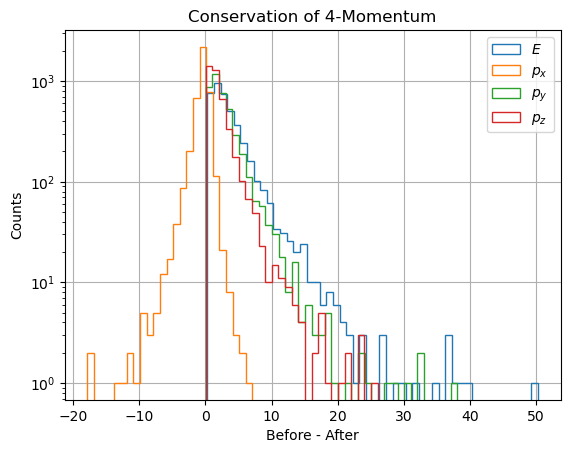

In [50]:
key = [r'$E$', r'$p_x$', r'$p_y$', r'$p_z$']

for i,conservation in enumerate(zip(momentum_before.T, momentum_after.T)):
    difference = conservation[0] - conservation[1]
    bins = np.arange(np.min(difference), np.max(difference), 1)
    plt.hist(difference, bins = bins, histtype = 'step', label = key[i])
    
plt.title('Conservation of 4-Momentum')
plt.xlabel('Before - After')
plt.ylabel('Counts')
plt.yscale('log')
plt.legend()
plt.grid()

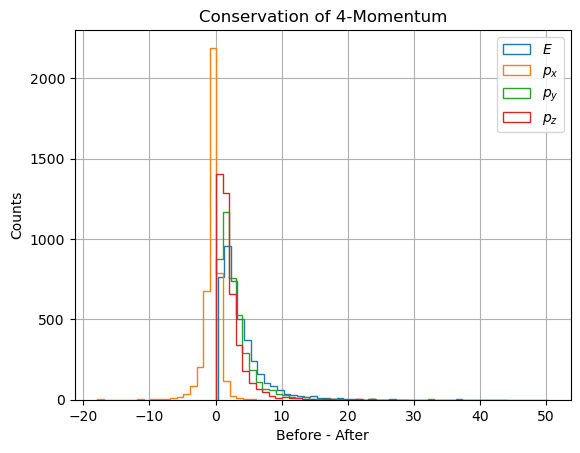

In [45]:
key = [r'$E$', r'$p_x$', r'$p_y$', r'$p_z$']

for i,conservation in enumerate(zip(momentum_before.T, momentum_after.T)):
    difference = conservation[0] - conservation[1]
    bins = np.arange(np.min(difference), np.max(difference), 1)
    plt.hist(difference, bins = bins, histtype = 'step', label = key[i])
    
plt.title('Conservation of 4-Momentum')
plt.xlabel('Before - After')
plt.ylabel('Counts')
plt.legend()
plt.grid()